# Итоговая контрольная работа по блоку специализация

## Урок 2. Итоговое задание:

### Задача 1:

**1. Подведите результаты эксперимента в по следующим данным: ab_stats.csv**

Стат значимо ли отличается ARPPU в двух группах ? 

Какие рекомендации дадите менеджеру?

![Изображение не загружено](Python.JPG)

In [7]:
# Импортируем необходимые библиотеки
import pandas as pd
from scipy import stats

In [2]:
# Чтение данных из CSV файла
df = pd.read_csv('ab_stats.csv')

In [4]:
# Выведем первые пять строк датафрейма и поледние пять строк для ознакомления
df

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814
...,...,...,...,...,...
23647,0.0,0,0,B,10.207152
23648,0.0,0,0,B,5.148761
23649,0.0,0,0,B,4.809019
23650,0.0,0,0,B,8.127488


## Структура и содержание данных

### Обзор данных
Датафрейм состоит из 23652 строк и 5 столбцов, каждый из которых представляет атрибуты пользователей, участвующих в A/B-тестировании, разделенных на две группы: A и B.

### Описание колонок

| Column Name    | Описание |
|----------------|----------|
| `revenue`      | Доход, полученный от пользователя. Нулевые значения в просмотренных строках указывают на отсутствие покупок. |
| `num_purchases`| Количество покупок, совершенных пользователем. Соответствует `revenue`, так как также показывает нули в просмотренных строках. |
| `purchase`     | Бинарный индикатор, где 1 означает совершение покупки, а 0 – отсутствие покупки. |
| `ab_group`     | Принадлежность пользователя к группе A/B-тестирования. В данных представлены группы A и B. |
| `av_site visit`| Средняя или накопительная продолжительность визитов пользователя на сайте. Значения положительные и варьируются. |

In [5]:
# Получим информацию о типах данных и количестве непустых значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


## Обзор данных датафрейма

### Тип объекта
- Экземпляр `DataFrame` из библиотеки `pandas`, используемый для хранения и манипулирования табличными данными.

### Индексация
- Индексы строк варьируются от 0 до 23651, что указывает на общее количество записей в датафрейме — 23652 строки.

### Колонки и типы данных
Датафрейм состоит из 5 столбцов с различными типами данных:
| #   | Column         | Non-Null Count | Dtype  |
|-----|----------------|----------------|--------|
| 0   | `revenue`      | 23652 non-null | float64|
| 1   | `num_purchases`| 23652 non-null | int64  |
| 2   | `purchase`     | 23652 non-null | int64  |
| 3   | `ab_group`     | 23652 non-null | object |
| 4   | `av_site visit`| 23652 non-null | float64|

- Все столбцы имеют полное количество значений (23652), что означает отсутствие пропущенных данных.
- `revenue` и `av_site visit` представлены вещественными числами.
- `num_purchases` и `purchase` содержат целые числа.
- `ab_group` содержит текстовые данные и представлен типом `object`.

### Использование памяти
- Датафрейм занимает приблизительно 924.0 KB оперативной памяти.

### Выводы
- Отсутствуют пропущенные значения в данных, что упрощает предварительную обработку.
- Типы данных столбцов соответствуют ожидаемым для каждой метрики, что позволяет планировать соответствующие аналитические и статистические методы для дальнейшего анализа.

In [6]:
# Описательные статистики для количественных переменных
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


## Описательная статистика данных

Обзор статистических показателей для каждого столбца дает нам следующую информацию:

### `revenue` (доход)
- **Среднее**: 0.324689
- **Стандартное отклонение**: 9.557730
- **Минимум**: 0.000000
- **25% квартиль**: 0.000000 (75% пользователей не приносили доход)
- **Медиана (50% квартиль)**: 0.000000
- **75% квартиль**: 0.000000
- **Максимум**: 1303.609284 (возможные выбросы или очень крупные покупки)

### `num_purchases` (количество покупок)
- **Среднее**: 0.043590
- **Стандартное отклонение**: 1.079403
- **Минимум**: 0.000000
- **25% квартиль**: 0.000000
- **Медиана (50% квартиль)**: 0.000000
- **75% квартиль**: 0.000000
- **Максимум**: 152.000000 (признаки аномалии или очень активных пользователей)

### `purchase` (покупка)
- **Среднее**: 0.020717 (подавляющее большинство пользователей не совершали покупок)
- **Стандартное отклонение**: 0.142438
- **Минимум**: 0.000000
- **25% квартиль**: 0.000000
- **Медиана (50% квартиль)**: 0.000000
- **75% квартиль**: 0.000000
- **Максимум**: 1.000000 (подтверждение бинарного признака)

### `av_site visit` (среднее время посещения сайта)
- **Среднее**: 7.013112
- **Стандартное отклонение**: 3.154584
- **Минимум**: -12.073486 (отрицательное значение указывает на потенциальную ошибку в данных)
- **25% квартиль**: 5.173787
- **Медиана (50% квартиль)**: 7.007936
- **75% квартиль**: 8.864119
- **Максимум**: 22.446822

Из этих данных можно заключить, что большинство пользователей не совершали покупок, и данные о времени посещения сайта могут содержать ошибки. Кроме того, распределение `revenue` и `num_purchases` сильно скошено, так как среднее значительно превышает медиану, что может указывать на наличие выбросов.

![Изображение не загружено](Python.JPG)

In [11]:
# Фильтруем данные, оставляя только строки с покупками
df_purchases = df[df['purchase'] == 1]

In [12]:
# Разделяем данные на две группы: A и B
group_a = df_purchases[df_purchases['ab_group'] == 'A']
group_b = df_purchases[df_purchases['ab_group'] == 'B']

In [17]:
# Вычисляем ARPPU для каждой группы
arppu_a = group_a['revenue'].mean()
arppu_b = group_b['revenue'].mean()

# Проверяем на нормальность распределения доходов в каждой группе
# Если данные распределены нормально, можно использовать t-тест
normal_a = stats.shapiro(group_a['revenue'])
normal_b = stats.shapiro(group_b['revenue'])

# Если данные не распределены нормально, лучше использовать U-тест Манна-Уитни
if normal_a.pvalue < 0.05 or normal_b.pvalue < 0.05:
    # Непараметрический тест
    stat, p_value = stats.mannwhitneyu(group_a['revenue'], group_b['revenue'])
else:
    # Параметрический тест
    stat, p_value = stats.ttest_ind(group_a['revenue'], group_b['revenue'])

# Выводим результаты
print('ARPPU группы А:', arppu_a)
print('ARPPU группы B:', arppu_b)
print('P-значение:', p_value)

# Основываясь на результатах, делаем рекомендации менеджеру
if p_value < 0.05:
    print("Есть статистически значимые различия в ARPPU между группами.")
else:
    print("Статистически значимых различий в ARPPU между группами не обнаружено.")

ARPPU группы А: 18.698468640625
ARPPU группы B: 12.36211875641025
P-значение: 0.8871956616344514
Статистически значимых различий в ARPPU между группами не обнаружено.


# Заключение и рекомендации:

## Рекомендации по результатам A/B-тестирования

### Продолжение тестирования
Текущие данные не демонстрируют статистически значимые различия в ARPPU. Рассмотрите возможность продолжения эксперимента для увеличения статистической мощности, особенно если размер выборок оказался недостаточным.

### Детальный анализ данных
Изучите другие метрики пользовательского взаимодействия, чтобы выявить возможные изменения в поведении пользователей, не отраженные в ARPPU.

### Сегментация пользователей
Проанализируйте результаты среди различных сегментов пользователей. Возможно, изменения более значимы для определенных групп, например, новых пользователей по сравнению с возвращающимися.

### Качественный анализ
Проведите качественные исследования, такие как интервью, опросы и анализ отзывов, чтобы лучше понять потребности и предпочтения пользователей.

### Проверка тестовой процедуры
Убедитесь, что A/B-тест был проведен корректно, без смещения выборки и влияния внешних факторов.

### Рассмотрение бизнес-метрик
Оцените влияние изменений на общие бизнес-показатели, такие как удержание пользователей, частоту покупок и общий доход.

### Информирование команды
Поделитесь результатами с командой продукта и маркетинга для информирования дальнейших стратегических и тактических решений.

### Задача 2:

2) Мы хотим провести А/Б-тест для трех источников трафика. 
   Нынешняя конверсия равна 5%, мы ожидаем прирост в 0,2%.
   Уровень доверия 97% и уровень мощности 87%.
   Всего на наш продукт заходит 40 000 пользователей в месяц.
   
3) За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по
   результатам подсчета?
   
3.1) Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите
результаты тестирования, если у нас следующие результаты по количеству конверсии:
1) 25 000
2) 30 000
3) 32 000

### Решение:

`Шаги выполнения по следовательно:`

1. Рассчитаем необходимый размер выборки для каждого источника трафика.
2. Определим продолжительность теста на основе количества пользователей в месяц.
3. Проанализируем результаты тестирования, используя z-тест.
4. Заключения рекомендации по результатам A/B-тестирования (За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по результатам подсчета?)

### 1. Расчет необходимого размера выборки

Будем использовать функцию `solve_power` из класса `NormalIndPower`, чтобы рассчитать необходимый размер выборки для каждого источника трафика. Нужно учесть текущую конверсию, ожидаемый прирост, уровень доверия и уровень мощности.

![Изображение не загружено](Python.JPG)

In [18]:
import numpy as np
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Зададим параметры для расчета
baseline_conversion = 0.05 # Нынешняя конверсия равна 5%
expected_lift = 0.002  # Ожидаемый прирост в 0.2%
confidence_level = 0.97 # Уровень доверия 97%
power_level = 0.87 # уровень мощности 87%

# Эффект размера на основе разности пропорций
effect_size = proportion_effectsize(baseline_conversion, baseline_conversion + expected_lift)

# Используем анализ мощности для расчета размера выборки
power_analysis = NormalIndPower()
sample_size_per_group = power_analysis.solve_power(
    effect_size=effect_size,
    power=power_level,
    alpha=1 - confidence_level,
    ratio=1  # Размер выборки для группы A относительно группы B
)

print(f"Необходимый размер выборки для каждой группы: {sample_size_per_group:.0f}")

Необходимый размер выборки для каждой группы: 262946


### 2. Определение продолжительности теста

Теперь, когда мы знаем `необходимый размер выборки`, мы можем определить `продолжительность теста`. Поскольку у нас есть 40 000 пользователей в месяц, мы можем разделить общее количество пользователей на ежедневное количество пользователей, чтобы получить продолжительность теста в днях.

![Изображение не загружено](Python.JPG)

In [19]:
monthly_users = 40000
daily_users = monthly_users / 30  # Примерное количество пользователей в день
duration_in_days = sample_size_per_group / daily_users
print(f"Продолжительность теста в днях для каждой группы: {duration_in_days:.0f}")

Продолжительность теста в днях для каждой группы: 197


### 3. Анализ результатов тестирования

Предположим, что у нас есть следующие результаты по количеству конверсии для каждого источника трафика:

1) 25 000
2) 30 000
3) 32 000

Теперь мы можем использовать z-тест для проверки различий между группами.

![Изображение не загружено](Python.JPG)

In [35]:
from statsmodels.stats.proportion import proportions_ztest

# Предположим, что это количество успехов (конверсий) для каждой группы и размеры групп
conversions = [25000, 30000, 32000]
# Предположим, что это размеры групп (количество пользователей в каждой группе)
# Значения должны быть реальными размерами выборки для каждой группы
total_users_per_group = [40000, 40000, 40000]  # Примерные размеры групп

# Попарные сравнения для z-теста
comparisons = [(0, 1), (0, 2), (1, 2)]
results = {}

for i, j in comparisons:
    stat, pval = proportions_ztest([conversions[i], conversions[j]],
                                    [total_users_per_group[i], total_users_per_group[j]])
    results[f"Группа {i+1} vs Группа {j+1}"] = (stat, pval)

# Выведем результаты
for comparison, (stat, pval) in results.items():
    print(f"{comparison} Z-статистика: {stat:.3f}, P-значение: {pval:.3f}")

Группа 1 vs Группа 2 Z-статистика: -38.139, P-значение: 0.000
Группа 1 vs Группа 3 Z-статистика: -54.682, P-значение: 0.000
Группа 2 vs Группа 3 Z-статистика: -16.933, P-значение: 0.000


### 4. Заключения рекомендации по результатам A/B-тестирования

### Рекомендации

- Если продолжительность теста слишком долгая: Подумайте о возможности увеличения трафика или принятия более консервативных параметров для уровня доверия и мощности.
- Если результаты тестирования показывают статистическую значимость: Рассмотрите возможность внедрения изменений, которые были протестированы в группе с улучшенной конверсией.
- Если результаты не являются статистически значимыми: Пересмотрите гипотезы и возможно увеличьте размер выборки или продолжительность теста.

### Задача 4:

Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в
каждой группе.

Для проверки нормальности распределения на выборке в 2350 наблюдений применили ,
критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.

Какой бы вывод мы могли сделать в данном случае?

В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше
всего подойдёт и почему ?

### Решение:

Если мы получили p-value, равное 0.00002, при использовании критерия Шапиро-Уилка для проверки нормальности распределения, и alpha (уровень значимости) составляет 5% (или 0.05), то наш результат теста на нормальность следующий:

`p-value < alpha (0.00002 < 0.05)`

Это значит, что мы отклоняем нулевую гипотезу о том, что данные распределены нормально. Следовательно, распределение выборки статистически значимо отличается от нормального распределения.

### Выбор статистического критерия

В данном случае, поскольку распределение данных не является нормальным, для сравнения средних двух групп лучше использовать непараметрический статистический критерий. Одним из таких критериев является критерий Манна-Уитни, который предназначен для сравнения двух независимых выборок. Этот критерий не требует предположения о нормальности распределения данных и может быть использован, когда данные имеют произвольное распределение.

![Изображение не загружено](Python.JPG)

In [6]:
import numpy as np
from scipy.stats import mannwhitneyu

# Сгенерируем случайные данные для примера
group1 = np.random.rand(2350)
group2 = np.random.rand(2350)

# Выполнение теста Манна-Уитни
stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

print(f'Статистика теста Манна-Уитни: {stat}')
print(f'P-значение: {p_value}')

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print('Отклоняем нулевую гипотезу, различия статистически значимы.')
else:
    print('Не отклоняем нулевую гипотезу, различия не статистически значимы.')

Статистика теста Манна-Уитни: 2744281.0
P-значение: 0.71525050992798
Не отклоняем нулевую гипотезу, различия не статистически значимы.


### Задача 5: 

Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы
получили следующие данные. Является ли результат статистически значимым с уровнем
доверия 80%? Какую версию мы выкатим на продакшн?

A) Средняя - 360, отклонение - 40, количество - 9802

B) Средняя - 352, отклонение - 58, количество - 9789                                      

### Решение:

Для определения статистической значимости различий в среднем времени, проведенном пользователями в группах A и B, мы можем использовать двувыборочный t-тест для независимых выборок. Уровень доверия в 80% соответствует уровню значимости (alpha) 20% или 0.2.

  Данные:
- Группа A: среднее = 360, стандартное отклонение = 40, размер выборки = 9802
- Группа B: среднее = 352, стандартное отклонение = 58, размер выборки = 9789

![Изображение не загружено](Python.JPG)

In [18]:
from scipy import stats

# Задаем данные
mean_a = 360
std_a = 40
n_a = 9802

mean_b = 352
std_b = 58
n_b = 9789

# Рассчитываем стандартные ошибки средних значений
se_a = std_a / (n_a ** 0.5)
se_b = std_b / (n_b ** 0.5)

# Рассчитываем стандартную ошибку разности средних
se_difference = (se_a**2 + se_b**2) ** 0.5

# Рассчитываем t-статистику
t_statistic = (mean_a - mean_b) / se_difference

# Рассчитываем степени свободы для двух выборок
df = n_a + n_b - 2

# Используем t-распределение для получения p-значения
p_value = stats.t.sf(abs(t_statistic), df) * 2  # Умножаем на 2 для двустороннего теста

# Выводим результаты
print(f't-статистика: {t_statistic}')
print(f'P-значение: {p_value}')

# Интерпретируем результат
alpha = 0.2  # Уровень значимости 20%
if p_value < alpha:
    print('Результат статистически значим с уровнем доверия 80%.')
    print('Выкатываем на продакшн версию B, так как она показала увеличение времени, проведенного пользователями.')
else:
    print('Результат не является статистически значимым.')

t-статистика: 11.236630785707332
P-значение: 3.310435400767472e-29
Результат статистически значим с уровнем доверия 80%.
Выкатываем на продакшн версию B, так как она показала увеличение времени, проведенного пользователями.


### Задача 6

Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра
с учетом кросс-девайс аналитики по следующей гипотезе:
Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит
конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны
пользователя.

На схеме необходимо отобразить:

1) Управленческий процесс по договоренностям с внешними партнерами
2) Архитектуру данных с указанием систем, из которых будем скачивать данные
3) Внутрикомандное взаимодействие

### Решение:

# Техническая архитектура проекта A/B тестирования для онлайн-кинотеатра

## Управленческий процесс

### Договоренности с внешними партнерами
1. **Подготовка предложения** - Разработка коммерческого предложения для банков с детализацией условий кампании по кэшбэку.
2. **Переговоры** - Встречи и переговоры с представителями банков для обсуждения деталей сотрудничества и условий кампании.
3. **Юридическое согласование** - Подготовка и согласование юридических документов, необходимых для запуска кампании.
4. **Техническая интеграция** - Работа с техническими специалистами банка и онлайн-кинотеатра для обеспечения интеграции систем.

## Архитектура данных

### Источники данных
- **Система управления пользователями (User Management System)** - данные о регистрациях и подписках пользователей.
- **Платежная система (Payment Gateway)** - данные о транзакциях и кэшбэках.
- **Система аналитики (Analytics System)** - данные о поведении пользователей на сайте и в приложении, включая кросс-девайс аналитику.

### Хранение данных
- **Data Warehouse** - централизованное хранилище для сбора данных из разных систем.

### Обработка и анализ данных
- **ETL процессы** - извлечение, трансформация и загрузка данных в Data Warehouse.
- **A/B Testing Platform** - система для проведения и анализа результатов A/B тестирования.

## Внутрикомандное взаимодействие

### Команда A/B тестирования
- **Продуктовые менеджеры** - формирование гипотез и определение метрик успеха.
- **Аналитики данных** - подготовка данных, анализ результатов тестирования.
- **Разработчики** - реализация технических изменений для проведения тестирования.
- **Маркетологи** - разработка коммуникаций и предложений для пользователей.
- **Партнерские менеджеры** - взаимодействие с банком и другими партнерами.

![Изображение не загружено](Python.JPG)

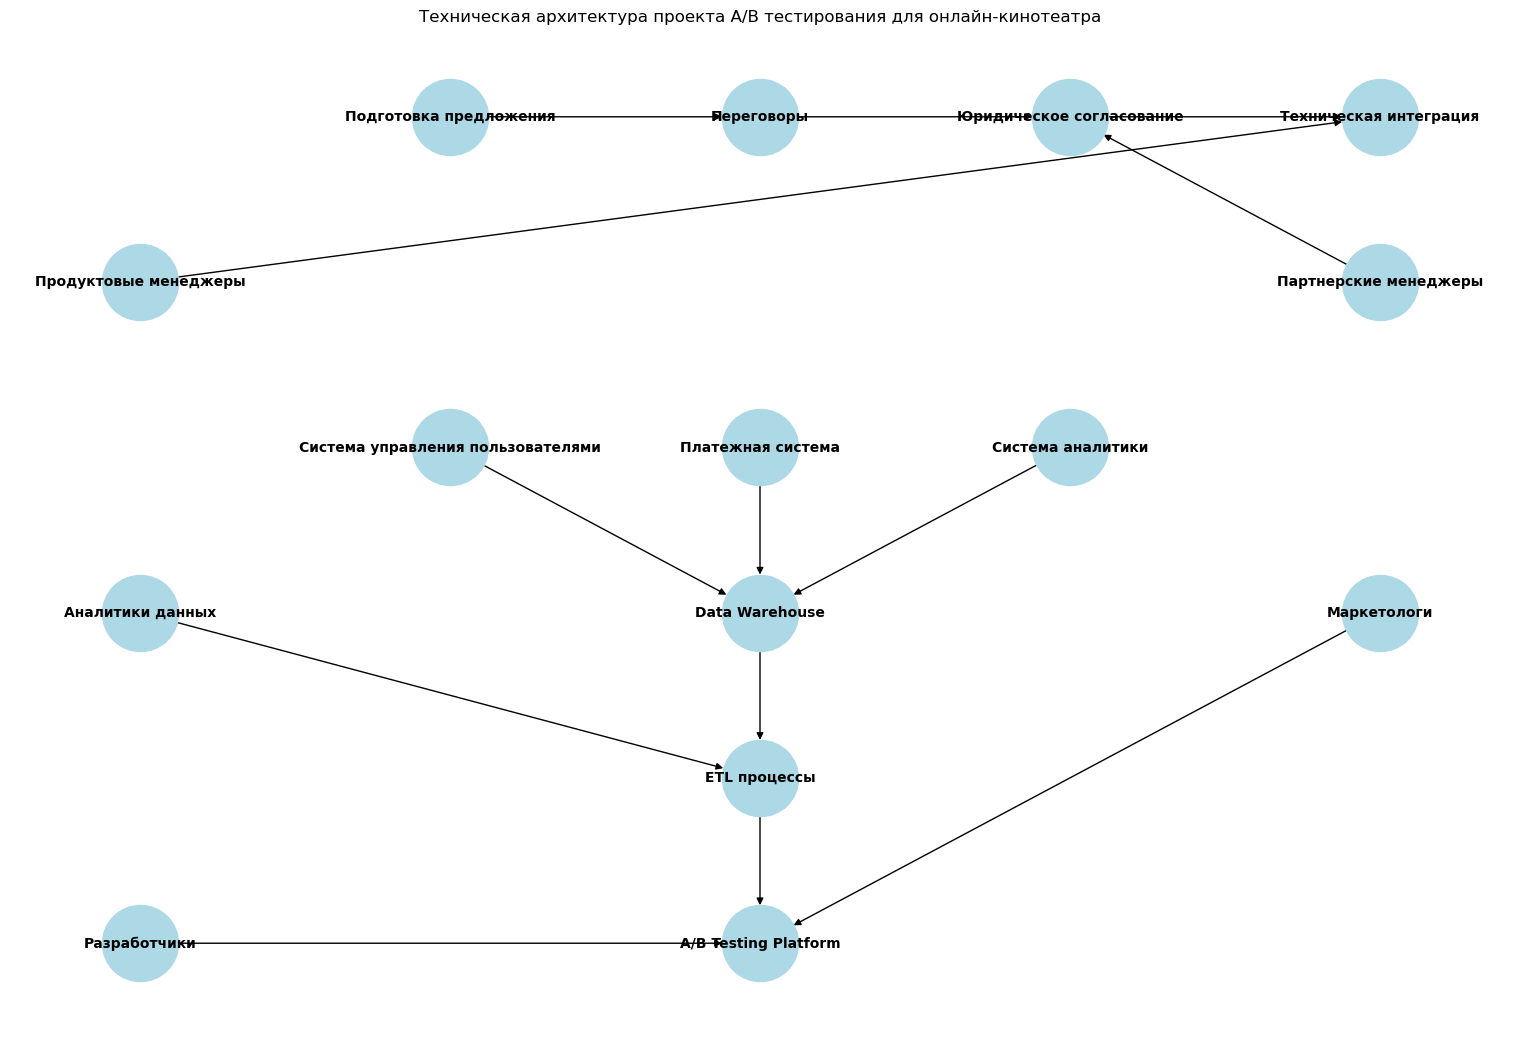

In [38]:
import matplotlib.pyplot as plt
import networkx as nx

# Создание графа
G = nx.DiGraph()

# Управленческий процесс
G.add_node("Подготовка предложения", pos=(0, 5))
G.add_node("Переговоры", pos=(1, 5))
G.add_node("Юридическое согласование", pos=(2, 5))
G.add_node("Техническая интеграция", pos=(3, 5))

# Архитектура данных
G.add_node("Система управления пользователями", pos=(0, 3))
G.add_node("Платежная система", pos=(1, 3))
G.add_node("Система аналитики", pos=(2, 3))
G.add_node("Data Warehouse", pos=(1, 2))
G.add_node("ETL процессы", pos=(1, 1))
G.add_node("A/B Testing Platform", pos=(1, 0))

# Взаимодействие команд
G.add_node("Продуктовые менеджеры", pos=(-1, 4))
G.add_node("Аналитики данных", pos=(-1, 2))
G.add_node("Разработчики", pos=(-1, 0))
G.add_node("Маркетологи", pos=(3, 2))
G.add_node("Партнерские менеджеры", pos=(3, 4))

# Ребра
edges = [
    ("Подготовка предложения", "Переговоры"),
    ("Переговоры", "Юридическое согласование"),
    ("Юридическое согласование", "Техническая интеграция"),
    ("Система управления пользователями", "Data Warehouse"),
    ("Платежная система", "Data Warehouse"),
    ("Система аналитики", "Data Warehouse"),
    ("Data Warehouse", "ETL процессы"),
    ("ETL процессы", "A/B Testing Platform"),
    ("Продуктовые менеджеры", "Техническая интеграция"),
    ("Аналитики данных", "ETL процессы"),
    ("Разработчики", "A/B Testing Platform"),
    ("Маркетологи", "A/B Testing Platform"),
    ("Партнерские менеджеры", "Юридическое согласование"),
]

G.add_edges_from(edges)

# Рисование графа
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(15, 10))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Техническая архитектура проекта A/B тестирования для онлайн-кинотеатра")
plt.show()

# Объяснение схемы технической архитектуры проекта A/B тестирования для онлайн-кинотеатра

## Управленческий процесс

### Подготовка предложения
- **Начальный этап**: Разработка коммерческого предложения для банков с детализацией условий кампании по кэшбэку.

### Переговоры
- **Встречи и переговоры**: С представителями банков для обсуждения деталей сотрудничества и условий кампании.

### Юридическое согласование
- **Подготовка и согласование юридических документов**: Необходимых для запуска кампании.

### Техническая интеграция
- **Работа с техническими специалистами**: Для обеспечения интеграции систем.

## Архитектура данных

### Система управления пользователями
- **Хранение данных**: О регистрациях и подписках пользователей.

### Платежная система
- **Данные о транзакциях и кэшбэках**: Информация о совершаемых операциях.

### Система аналитики
- **Данные о поведении пользователей**: Анализ активности пользователей в сервисе.

### Data Warehouse
- **Централизованное хранилище данных**: Сбор данных из различных систем.

### ETL процессы
- **Извлечение, трансформация и загрузка данных**: Подготовка данных для анализа.

### A/B Testing Platform
- **Система для проведения и анализа A/B тестов**: Тестирование различных гипотез.

## Взаимодействие команд

### Продуктовые менеджеры
- **Формирование гипотез и метрик успеха**: Определение ключевых показателей для тестирования.

### Аналитики данных
- **Подготовка данных и анализ результатов**: Выполнение статистического анализа.

### Разработчики
- **Реализация технических изменений**: Внесение изменений в продукт для проведения теста.

### Маркетологи
- **Разработка коммуникаций для пользователей**: Создание привлекательных предложений.

### Партнерские менеджеры
- **Взаимодействие с банком и партнерами**: Управление отношениями с ключевыми стейкхолдерами.